In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
import random
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
%matplotlib inline

In [2]:
path ="600092_data.csv" 
df = pd.read_csv(path, encoding = 'utf-8')

df_copy1 = df.copy()##used for cleaning
df_copy2 = df.copy()##cleaned model for 1.0
df_copy4 = df.copy()##cleaned model for 2.0
df_copy6 = df.copy()##cleaned model for 3.0

##df is the original dataframe

# Data Exploration phase

During this period, a brief overview of what is contained in our legacy data is observed and weighed in regard to its respective attribute

## Expected data types

Data attributes for each column are displayed below:

* Random column - Real numbers(all unique)
* ID column - Real numbers(all unique but duplicates allowed)
* Indication - string/object type (4 nominal values)"ASx, A-F,CVA,TIA"
* Diabetes - string/object type(2 nominal values)"yes, no"
* IHD - string/object type(2 nominal values)"yes, no"
* Hypertension - string/object type(2 nominal values)"yes, no"
* Arrhythmia - string/object type(2 nominal values)"yes, no"
* History - string/object type(2 nominal values)"yes, no"
* IPSI - float type(0 - 100)
* Contra - float type(0 - 100)
* label - string/object type(2 nominal values)"risk,no risk"

In [3]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [4]:
df.isnull().sum()

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          0
label           3
dtype: int64

In [5]:
df.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509545,188365.022368,78.872032
std,0.284006,64355.870242,10.162351
min,0.000295,78261.000000,35.000000
25%,0.268531,137130.750000,73.000000
50%,0.517616,191344.500000,77.000000
75%,0.754724,244559.500000,85.000000
max,0.999448,295978.000000,99.000000


In [6]:
df['Contra'].describe()

count     1520
unique      41
top        100
freq       244
Name: Contra, dtype: object

In [7]:
df['IPSI'].describe()

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

### First Analysis

All data attributes match its respective data type apart from Contra. This indicates that Contra needs cleaning.

In the indication attribute, there is an expected unique count of 4. However, the indication attribute returned 5 unique counts indicating that Indication attribute needs cleaning. Moreover, indication is seen to contain null values this is because it gives a total value count of 1517 instead of the full 1520 indicating 3 null values

History needs cleaning because there are prescence of null values. This is because history has a values count of 1518 instead of 1520

IPSI needs cleaning because there are prescence of null values. This is because IPSI has a values count of 1516 instead of 1520

Hypertension needs cleaning because there are prescence of null values. This is because Hypertension has a values count of 1517 instead of 1520

Diabetes needs cleaning because there are prescence of null values. This is because Diabetes has a values count of 1518 instead of 1520

### Second Analysis 

Although unique values were expected for the random column, duplicates were found as shown in the code below

In [8]:
f =  df.duplicated(subset='Random', keep=False)
t = True

for item in f:
    if item == t:
        print("yes")
        break

yes


Whereas the Id attribute contains no duplicates as shown in code below because it didnt return "true" for all variables 

In [9]:
f =  df.duplicated(subset='Id', keep=False)
t = True

for item in f:
    if item == t:
        print("yes")
        break

### Conclusion

After careful analysis the following attributes need cleaning:
* Random attribute
* Hypertension attribute
* Diabetes attribute
* Contra attribute
* IPSI attribute
* Indication attribute
* History attribute

# Data Preparation Phase

This section involves all cleaning methods done to prepare our data for feeding it to our fin al model classifier to predict patient mortality

## Cleaning 1.0

### Cleaning null values 

### Categorical values

### Hypertension cleaning

#### Step 1

The first step involves locating the index in which the null value(s) are located. This is done by separating out the hypertension column into a pandas.series and creating a truth table. If the value in the truth table returns "true" the index of that value(s) is stored in a list.

The indexes are kept track of by a counter variable. Using the indexes stored in the list, the null values are then located using "df_copy1.loc[var, :]" where "var" is a value in the list 

In [10]:
df_copy1 = df.copy()
Hypertension_column = df_copy1['Hypertension']
Hypertension_null_index_positions = []

x = Hypertension_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        Hypertension_null_index_positions.append(counter)
    counter = counter + 1

Hypertension_null_index_positions

[201, 590, 983]

In [11]:
print(df_copy1.loc[201, :])
##yes

x = df_copy2.loc[201, :]
x[5] = "yes"
df_copy2.loc[201, :] = x

Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        NaN
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
df_copy1.loc[590, :]
##no

x = df_copy2.loc[590, :]
x[5] = "no"
df_copy2.loc[590, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
df_copy1.loc[983, :]
##no

x = df_copy2.loc[983, :]
x[5] = "no"
df_copy2.loc[983, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Step 2

In relation to the previous step, we consider all nominal values surrounding the missing variable to generate a query for the dataframe. In this case, the missing variable is Hypertension. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* CVA - Indication 
* yes - Diabetes
* no - IHD
* yes - Arrhythmia
* no - History

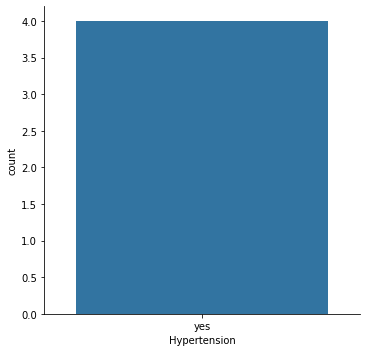

In [14]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('Indication == "CVA" and Diabetes =="yes" and IHD =="no" and Arrhythmia == "yes" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Hypertension', data = copy1, kind='count' )

for the second missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* A-F - Indication 
* no - Diabetes
* no - IHD
* no - Arrhythmia
* no - History

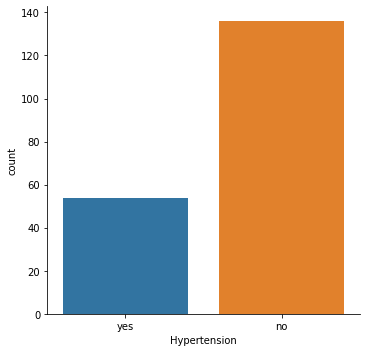

In [15]:
df_copy1 = df.copy()##first line included  to 'reset' the dataframe
df_copy1.query('Indication == "A-F" and Diabetes =="no" and IHD =="no" and Arrhythmia == "no" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Hypertension', data = copy1, kind='count' )

for the third missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* TIA - Indication 
* no - Diabetes
* no - IHD
* no - Arrhythmia
* no - History

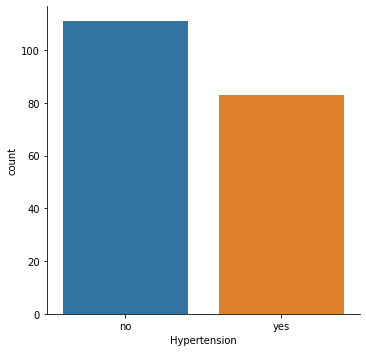

In [16]:
df_copy1 = df.copy()##first line included  to 'reset' the dataframe
df_copy1.query('Indication == "TIA" and Diabetes =="no" and IHD =="no" and Arrhythmia == "no" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Hypertension', data = copy1, kind='count' )

### Indication cleaning

#### Step 1

The first step involves locating the index in which the null value(s) are located. This is done by separating out the Indication column into a pandas.series and creating a truth table. If the value in the truth table returns "true" the index of that value(s) is stored in a list.

The indexes are kept track of by a counter variable. Using the indexes stored in the list, the null values are then located using "df_copy1.loc[var, :]" where "var" is a value in the list 

In [17]:
df_copy1 = df.copy()
Indication_column = df_copy1['Indication']
Indication_null_index_positions = []

x = Indication_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        Indication_null_index_positions.append(counter)
    counter = counter + 1

Indication_null_index_positions

[442, 822, 1007]

In [18]:
df_copy1.loc[442, :]

x = df_copy2.loc[442, :]
x[2] = "TIA"
df_copy2.loc[442, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
df_copy1.loc[822, :]

x = df_copy2.loc[822, :]
x[2] = "A-F"
df_copy2.loc[822, :] = x


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
df_copy1.loc[1007, :]

x = df_copy2.loc[1007, :]
x[2] = "CVA"
df_copy2.loc[1007, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Step 2

In relation to the previous step, we consider all nominal values surrounding the missing variable to generate a query for the dataframe. In this case, the missing variable is Hypertension. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* yes - Hypertension 
* no - Diabetes
* yes - IHD
* no - Arrhythmia
* no - History
* NoRisk - Label

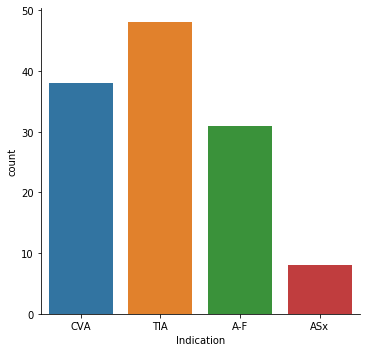

In [21]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and Diabetes =="no" and IHD =="yes" and Hypertension == "yes" and Arrhythmia == "no" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Indication', data = copy1, kind='count' )

for the second missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* no - Hypertension 
* no - Diabetes
* yes - IHD
* no - Arrhythmia
* no - History
* Risk - Label

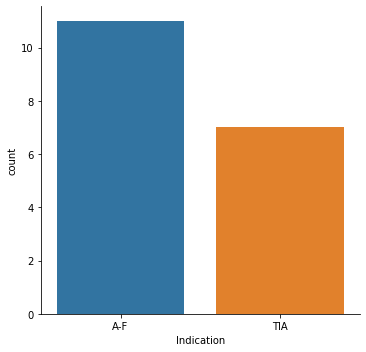

In [22]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and Diabetes =="no" and IHD =="yes" and Hypertension == "no" and Arrhythmia == "no" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Indication', data = copy1, kind='count' )

for the third missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* no - Hypertension 
* no - Diabetes
* no - IHD
* yes - Arrhythmia
* yes - History
* Risk - Label

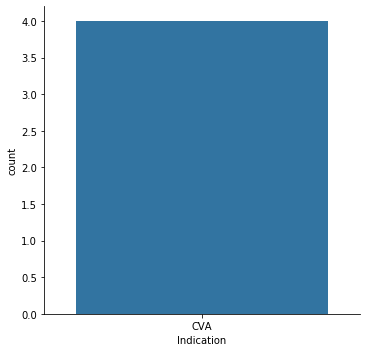

In [23]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and Diabetes =="no" and IHD =="no" and Hypertension == "no" and Arrhythmia == "yes" and History =="yes"', inplace = True) 
copy1 = df_copy1
sns.catplot('Indication', data = copy1, kind='count' )

### History values 

#### Step 1

The first step involves locating the index in which the null value(s) are located. This is done by separating out the History column into a pandas.series and creating a truth table. If the value in the truth table returns "true" the index of that value(s) is stored in a list.

The indexes are kept track of by a counter variable. Using the indexes stored in the list, the null values are then located using "df_copy1.loc[var, :]" where "var" is a value in the list 

In [24]:
df_copy1 = df.copy()
History_column = df_copy1['History']
History_null_index_positions = []

x = History_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        History_null_index_positions.append(counter)
    counter = counter + 1

History_null_index_positions

[337, 784]

In [25]:
df_copy1.loc[337, :]

x = df_copy2.loc[337, :]
x[7] = "no"
df_copy2.loc[337, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
df_copy1.loc[784, :]

x = df_copy2.loc[784, :]
x[7] = "no"
df_copy2.loc[784, :] = x

df_copy2.loc[784, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.243645
Id                196483
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra               100
label               Risk
Name: 784, dtype: object

#### Step 2

In relation to the previous step, we consider all nominal values surrounding the missing variable to generate a query for the dataframe. In this case, the missing variable is Hypertension. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* no - Hypertension 
* no - Diabetes
* yes - IHD
* no - Arrhythmia
* CVA - Indication
* NoRisk - Label

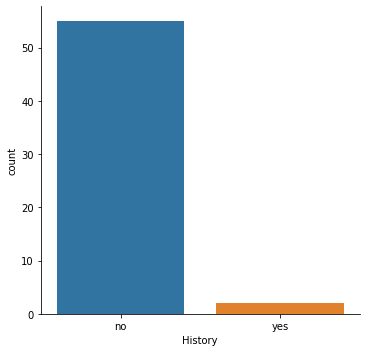

In [27]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and Diabetes =="no" and IHD =="yes" and Hypertension == "no" and Arrhythmia == "no" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('History', data = copy1, kind='count' )

for the SECOND missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* YES - Hypertension 
* no - Diabetes
* no - IHD
* YES - Arrhythmia
* CVA - Indication
* Risk - Label

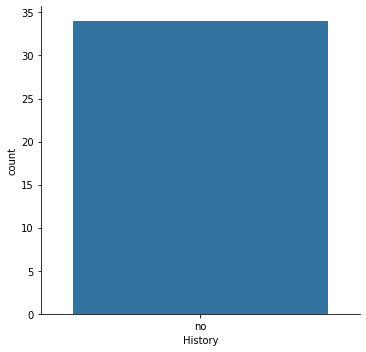

In [28]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and Diabetes =="no" and IHD =="no" and Hypertension == "yes" and Arrhythmia == "yes" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('History', data = copy1, kind='count' )

### Diabetes values 

#### Step 1

The first step involves locating the index in which the null value(s) are located. This is done by separating out the Diabetes column into a pandas.series and creating a truth table. If the value in the truth table returns "true" the index of that value(s) is stored in a list.

The indexes are kept track of by a counter variable. Using the indexes stored in the list, the null values are then located using "df_copy1.loc[var, :]" where "var" is a value in the list 

In [29]:
df_copy1 = df.copy()
Diabetes_column = df_copy1['Diabetes']
Diabetes_null_index_positions = []

x = Diabetes_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        Diabetes_null_index_positions.append(counter)
    counter = counter + 1

Diabetes_null_index_positions

[447, 514]

In [30]:
df_copy1.loc[447, :]

x = df_copy2.loc[447, :]
x[3] = "no"
df_copy2.loc[447, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
df_copy1.loc[514, :]

x = df_copy2.loc[ 514, :]
x[3] = "no"
df_copy2.loc[514, :] = x

df_copy2.loc[514, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.39213
Id               210861
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object

#### Step 2

In relation to the previous step, we consider all nominal values surrounding the missing variable to generate a query for the dataframe. In this case, the missing variable is Hypertension. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the dataframe which are:
* yes - Hypertension 
* no - History
* yes - IHD
* yes - Arrhythmia
* CVA - Indication
* Risk - Label

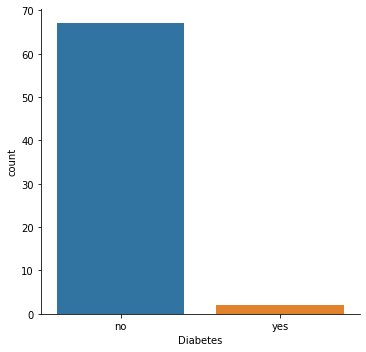

In [32]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and History =="no" and IHD =="yes" and Hypertension == "yes" and Arrhythmia == "yes" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('Diabetes', data = copy1, kind='count' )

for the SECOND missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* YES - Hypertension 
* no - History
* no - IHD
* no - Arrhythmia
* A-F - Indication
* NoRisk - Label

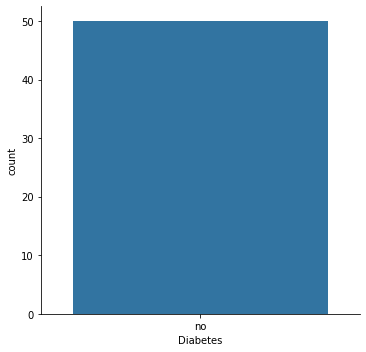

In [33]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and History =="no" and IHD =="no" and Hypertension == "yes" and Arrhythmia == "no" and Indication =="A-F"', inplace = True) 
copy1 = df_copy1
sns.catplot('Diabetes', data = copy1, kind='count' )

### Float/ Integer values

### Contra and IPSI

### Step 1 (IPSI)

The first step involves locating the index in which the null value(s) are located. This is done by separating out the IPSI column into a pandas.series and creating a truth table. If the value in the truth table returns "true" the index of that value(s) is stored in a list.

The indexes are kept track of by a counter variable. Using the indexes stored in the list, the null values are then located using "df_copy1.loc[var, :]" where "var" is a value in the list 

In [34]:
df_copy1 = df.copy()
IPSI_column = df_copy1['IPSI']
IPSI_null_index_positions = []

x = IPSI_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        IPSI_null_index_positions.append(counter)
    counter = counter + 1

IPSI_null_index_positions
df_copy1 = df.copy()

#### Step 2(IPSI)

In relation to the previous step, we consider all nominal values surrounding the missing variable to generate a query for the dataframe. In this case, the missing variable is Hypertension. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the dataframe which are:
* NO - Hypertension 
* no - History
* NO - IHD
* NO - Arrhythmia
* CVA - A-F
* Risk - Label

In [35]:
df_copy1.loc[620, :]

x = df_copy2.loc[ 620, :]
x[8] = 80.0
df_copy2.loc[620, :] = x

df_copy2.loc[620, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.283872
Id                227779
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  80
Contra               100
label               Risk
Name: 620, dtype: object

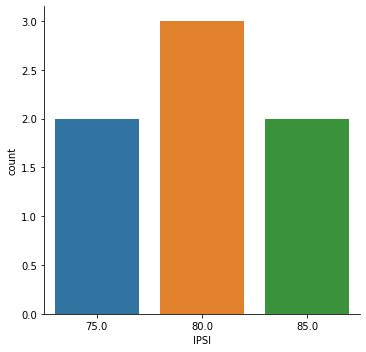

In [36]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and History =="no" and IHD =="no" and Diabetes == "no" and Hypertension == "no" and Contra =="100" and Arrhythmia == "no" and Indication =="A-F"', inplace = True) 
copy1 = df_copy1
sns.catplot('IPSI', data = copy1, kind='count' )
df_copy1 = df.copy()

Second missing variable we consider its respective nominal values surrounding to generate a query for the dataframe which are:
* yes - Hypertension 
* no - History
* yes - IHD
* yes - Arrhythmia
* CVA - Indication
* no - Diabetes
* Risk - Label

In [37]:
df_copy1.loc[752, :]

x = df_copy2.loc[ 752, :]
x[8] = 90.0
df_copy2.loc[752, :] = x

df_copy2.loc[752, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.243518
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 752, dtype: object

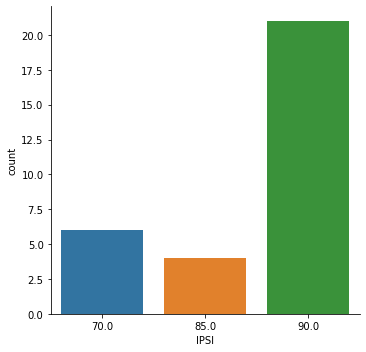

In [38]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and History =="no" and IHD =="yes" and Diabetes == "no" and Contra =="100" and Hypertension == "yes" and Arrhythmia == "yes" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('IPSI', data = copy1, kind='count' )
df_copy1 = df.copy()

In [39]:
df_copy1.loc[845, :]

x = df_copy2.loc[ 845, :]
x[8] = 70.0
df_copy2.loc[845, :] = x

df_copy2.loc[845, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra                20
label             NoRisk
Name: 845, dtype: object

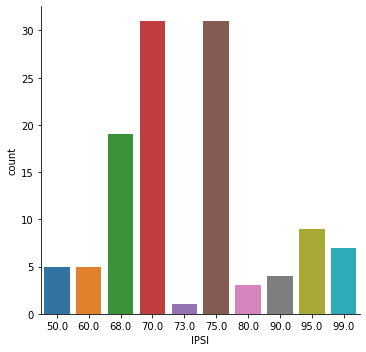

In [40]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and History =="no" and IHD =="no" and Diabetes == "no" and Hypertension == "no" and Arrhythmia == "no" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('IPSI', data = copy1, kind='count' )
df_copy1 = df.copy()

In [41]:
df_copy1.loc[916, :]

x = df_copy2.loc[ 916, :]
x[8] = 80.0
df_copy2.loc[916, :] = x

df_copy2.loc[916, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.00450114
Id                  281679
Indication             A-F
Diabetes                no
IHD                     no
Hypertension            no
Arrhythmia              no
History                 no
IPSI                    80
Contra                  50
label               NoRisk
Name: 916, dtype: object

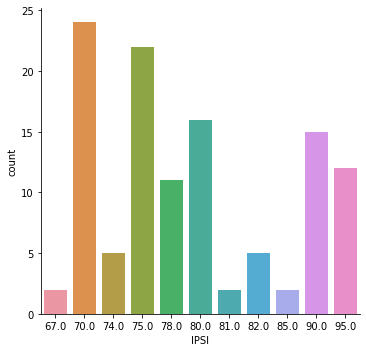

In [42]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and History =="no" and IHD =="no" and Diabetes == "no" and Hypertension == "no" and Arrhythmia == "no" and Indication =="A-F"', inplace = True) 
copy1 = df_copy1
sns.catplot('IPSI', data = copy1, kind='count' )
df_copy1 = df.copy()

In [43]:
df_copy1 = df.copy()
Contra_column = df_copy1['Contra']
Contra_null_index_positions = []
c = 0
for item in Contra_column:
    if item == " ":
        Contra_null_index_positions.append(c)
    c = c + 1
    
Contra_null_index_positions

[453]

In [44]:
df_copy1.loc[453, :]

x = df_copy2.loc[ 453, :]
x[9] = 60.0
df_copy2.loc[453, :] = x

df_copy2.loc[453, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                60
label             NoRisk
Name: 453, dtype: object

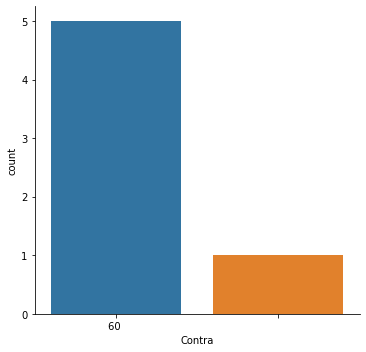

In [45]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and History =="no" and IHD =="no" and Diabetes == "no" and IPSI == 70 and Hypertension == "yes" and Arrhythmia == "no" and Indication =="ASx"', inplace = True) 
copy1 = df_copy1
sns.catplot('Contra', data = copy1, kind='count' )
df_copy1 = df.copy()

### Repairing Indication (Extra nominal value)

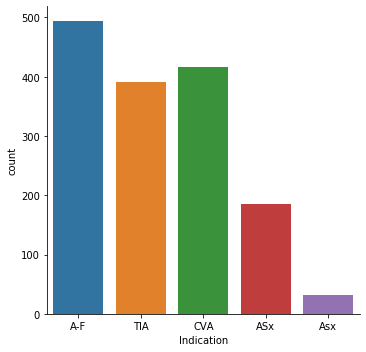

In [46]:
sns.catplot('Indication', data = df_copy2, kind='count' )

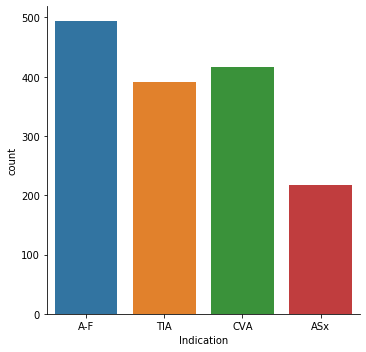

In [47]:
df_copy2['Indication'] = df_copy2['Indication'].replace(['Asx'], 'ASx')
sns.catplot('Indication', data = df_copy2, kind='count' )

In [48]:
df_copy2['Indication'].describe()

count     1520
unique       4
top        A-F
freq       494
Name: Indication, dtype: object

In [49]:
df_copy2['Diabetes'].describe()

count     1520
unique       2
top         no
freq      1443
Name: Diabetes, dtype: object

In [50]:
df_copy2['Hypertension'].describe()

count     1520
unique       2
top         no
freq       786
Name: Hypertension, dtype: object

In [51]:
df_copy2['History'].describe()

count     1520
unique       2
top         no
freq      1496
Name: History, dtype: object

In [52]:
df_copy2['Arrhythmia'].describe()

count     1520
unique       2
top         no
freq      1190
Name: Arrhythmia, dtype: object

In [53]:
df_copy2['IPSI'].describe()

count    1520.000000
mean       78.875000
std        10.155611
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [54]:
contra = df_copy2['Contra']
c = 0
for item in contra:
    contra[c] = float(item)
    c = c + 1
contra.describe()

df_copy2['Contra'] = contra

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [55]:

label = df_copy2['label'].isnull()
c = 0
t = True
Llist = []
for item in label:
    if item == t:
        Llist.append(c)
    c = c + 1
Llist

[812, 974, 1418]

In [56]:
df_copy2


,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


# Modelling 1

## Using neural network

In [57]:
df_copy3 = df_copy2.copy()

x = df_copy3.loc[812, :]
x[10] = "NoRisk"
df_copy3.loc[812, :] = x

x = df_copy3.loc[974, :]
x[10] = "NoRisk"
df_copy3.loc[974, :] = x

x = df_copy3.loc[1418, :]
x[10] = "NoRisk"
df_copy3.loc[1418, :] = x

x = df_copy3.loc[475, :]
x[10] = "NoRisk"
df_copy3.loc[475, :] = x

x = df_copy3.loc[523, :]
x[10] = "NoRisk"
df_copy3.loc[523, :] = x


##class dictionaries
Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "TIA": 4}
Dual_class_dict = {"yes": 1, "no": 2}
label_class_dict = {"Risk": 1, "NoRisk": 2, "NaN": 3}

##mapping
df_copy3['Diabetes'] = df_copy3['Diabetes'].map(Dual_class_dict)
df_copy3['Hypertension'] = df_copy3['Hypertension'].map(Dual_class_dict)
df_copy3['History'] = df_copy3['History'].map(Dual_class_dict)
df_copy3['Indication'] = df_copy3['Indication'].map(Indication_class_dict)
df_copy3['Arrhythmia'] = df_copy3['Arrhythmia'].map(Dual_class_dict)
df_copy3['IHD'] = df_copy3['IHD'].map(Dual_class_dict)
df_copy3['label'] = df_copy3['label'].map(label_class_dict)

##df_copy3['label'] = df_copy3['label'].map(label_class_dict, na_action = 'ignore')
##df_copy3.query('label == "2"', inplace = True) 

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\scowt\Anaconda3\lib\site-pack

In [58]:
df_copy3['label'].isnull().sum()

label = df_copy3['label'].isnull()
c = 0
t = True
Llist = []
for item in label:
    if item == t:
        Llist.append(c)
    c = c + 1
Llist

[]

In [59]:
df_copy3.isnull().sum()

Random          0
Id              0
Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

In [60]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm



### SVM model(Model 1.0)

In [61]:
df_copy3.drop(df_copy3.columns[[0, 1]], axis = 1, inplace = True) ##only needs to be done once

In [62]:
df_copy3 = sklearn.utils.shuffle(df_copy3) #always shuffle your data to avoid any biases 
X = df_copy3.drop("label", axis=1).values
y = df_copy3["label"].values

##training
test_size = 50

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]

clf = svm.SVR()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.810321078381964


In [63]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(clf.predict([X])[0])
    actual_predictions.append(y)

### logistic regression(Model 1.1)

In [64]:
df_copy3 = sklearn.utils.shuffle(df_copy3) # always shuffle your data to avoid any biases 
X = df_copy3.drop("label", axis=1).values
y = df_copy3["label"].values

##training
test_size = 50

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]



model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

1.0


C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(model.predict([X])[0])
    actual_predictions.append(y)

### Multi layer perceptron(Model 1.2)

In [66]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='sgd', max_iter=500000, hidden_layer_sizes=(10,20,30,35,45,30,40,50,20,10), random_state=1)
trained_model = model.fit(X_train,y_train)
print(trained_model.score(X_test, y_test))

0.9


In [67]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(trained_model.predict([X])[0])
    actual_predictions.append(y)

# Cleaning 2.0 (Decision trees)

## Data preparation and training

Data is first cleared of all null values before being fed into the decision tree algorithm. Nulls are cleared to increase efficiency of the decicion tree.

In [68]:
from sklearn import tree

d = df_copy4.dropna() ## drops all null values
d = d.reset_index() ##resets index in order to locate data points by index correctly

Dataframe is then processed so that it can be digestible by the decision tree model. This is done by mapping through converting nominal values into integer values. This will be done through mapping. Random and ID attributes are removed as they will not be considered for this model.
However, Contra attribute needs to be first converted to a float/integers

In [69]:
contra = d['Contra']
c = 0  ##counter variable
for item in contra:
    if item == " ":
        contra[c] = float(60)
    contra[c] = float(contra[c])
    c =c + 1

d['Contra'] = contra ## assign floats back to contra

d.drop(d.columns[[0, 1, 2]], axis = 1, inplace = True) ##Random, index and ID columns dropped

##class dictionaries
Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
Dual_class_dict = {"yes": 1, "no": 2}
label_class_dict = {"Risk": 1, "NoRisk": 2}

##mapping
d['Diabetes'] = d['Diabetes'].map(Dual_class_dict)
d['Hypertension'] = d['Hypertension'].map(Dual_class_dict)
d['History'] = d['History'].map(Dual_class_dict)
d['Indication'] = d['Indication'].map(Indication_class_dict)
d['Arrhythmia'] = d['Arrhythmia'].map(Dual_class_dict)
d['IHD'] = d['IHD'].map(Dual_class_dict)
d['label'] = d['label'].map(label_class_dict)

d = d.dropna() ## drops all null values

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## First use case, filling up label values 

Processed data is then fitted into a model and a score is given. For pur first use case, we will train the decision tree to predict the label values. Therefore, our label value will be our label(s) and the rest of the data will be our features. 
The score of the model is then given as shown.

In [70]:
d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("label", axis=1).values ##features
y = d["label"].values ##labels

##training
test_size = 300

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  99.0


In [71]:
d

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
935,4,2,2,1,2,2,90.0,85,1.0
238,4,2,2,2,2,2,75.0,20,2.0
175,3,2,2,1,2,2,73.0,25,2.0
827,1,2,2,2,2,2,95.0,20,2.0
1123,4,2,1,2,2,2,73.0,30,2.0
...,...,...,...,...,...,...,...,...,...
62,1,2,2,1,2,2,75.0,25,2.0
1463,1,2,2,1,1,2,95.0,100,1.0
265,3,2,2,2,2,2,70.0,20,2.0
611,4,2,2,2,2,2,68.0,20,2.0


Since the accuracy is quite high, we will use the model to predict our missing label values. However, in order for the model to understand what we give it, we muxt transform the desired data into a 2D array.
The first step is finding the NaN values in our label then transform our data such that our model can understand and predict appropriately.


In [72]:

w = [[1,1,1,1,2,2,75,85]]
model.predict(w)
##2 = Risk
##1 = NoRisk

array([2.])

In [73]:
null_label = []
n_l = df_copy4['label'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[812, 974, 1418]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case

In [74]:
df_copy4.loc[812,:]

Random          0.756938
Id                190671
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  76
Contra                50
label                NaN
Name: 812, dtype: object

In [75]:
w = [[2,2,1,1,2,2,75,50]] ##variable to put array values
model.predict(w) ##norisk

array([2.])

In [76]:
##replacing values
x = df_copy4.loc[812,:]
x[10] = "NoRisk"
df_copy4.loc[812,:] = x
df_copy4.loc[812,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.756938
Id                190671
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  76
Contra                50
label             NoRisk
Name: 812, dtype: object

In [77]:
df_copy4.loc[974,:]

Random          0.923418
Id                165432
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  80
Contra                70
label                NaN
Name: 974, dtype: object

In [78]:
w = [[2,2,1,1,1,2,80,70]]
model.predict(w) ##risk

array([1.])

In [79]:
##replacing values
x = df_copy4.loc[974,:]
x[10] = "Risk"
df_copy4.loc[974,:] = x
df_copy4.loc[974,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.923418
Id                165432
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  80
Contra                70
label               Risk
Name: 974, dtype: object

In [80]:
df_copy4.loc[1418,:]

Random          0.813102
Id                169726
Indication           TIA
Diabetes             yes
IHD                   no
Hypertension          no
Arrhythmia            no
History              yes
IPSI                  90
Contra                50
label                NaN
Name: 1418, dtype: object

In [81]:
w = [[4,1,2,2,2,1,95,50]] ##variable to put array values
model.predict(w) ##norisk

array([1.])

In [82]:
##replacing values
x = df_copy4.loc[1418,:]
x[10] = "NoRisk"
df_copy4.loc[1418,:] = x
df_copy4.loc[1418,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.813102
Id                169726
Indication           TIA
Diabetes             yes
IHD                   no
Hypertension          no
Arrhythmia            no
History              yes
IPSI                  90
Contra                50
label             NoRisk
Name: 1418, dtype: object

In [83]:
df_copy4.loc[475,:]

Random          0.298074
Id                173791
Indication           ASx
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                55
label            Unknown
Name: 475, dtype: object

In [84]:
w = [[3,2,1,1,2,2,70,55]] ##variable to put array values
model.predict(w) ##NoRisk

array([1.])

In [85]:
##replacing values
x = df_copy4.loc[475,:]
x[10] = "NoRisk"
df_copy4.loc[475,:] = x
df_copy4.loc[475,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.298074
Id                173791
Indication           ASx
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                55
label             NoRisk
Name: 475, dtype: object

In [86]:
df_copy4.loc[523,:]

Random          0.46017
Id               283846
Indication          CVA
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra              100
label           Unknown
Name: 523, dtype: object

In [87]:
w = [[2,2,2,1,1,2,95,100]] ##variable to put array values
model.predict(w) ##risk

array([1.])

In [88]:
##replacing values
x = df_copy4.loc[523,:]
x[10] = "Risk"
df_copy4.loc[523,:] = x
df_copy4.loc[523,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.46017
Id               283846
Indication          CVA
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra              100
label              Risk
Name: 523, dtype: object

## Second use case, filling up Hypertension values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [89]:
d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("Hypertension", axis=1).values ##features(tewaked for hypertension)
y = d["Hypertension"].values ##labels(teaked for hypertension)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  93.0


Next step is finding null values in hypertension and using the model to predict its value

In [90]:
null_label = []
n_l = df_copy4['Hypertension'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[201, 590, 983]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded hypertension in our features, we "skip" hypertension during value input into array

In [91]:
df_copy4.loc[201,:]

Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        NaN
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object

In [92]:
w = [[2,1,2,1,2,95,90,1]] ##variable to put array values
model.predict(w) ##has hypertension

array([1], dtype=int64)

In [93]:
##replacing values
x = df_copy4.loc[201,:]
x[5] = "yes"
df_copy4.loc[201,:] = x
df_copy4.loc[201,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object

In [94]:
df_copy4.loc[590,:]

Random          0.70795
Id               289096
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        NaN
Arrhythmia           no
History              no
IPSI                 78
Contra               30
label            NoRisk
Name: 590, dtype: object

In [95]:
w = [[1,2,2,2,2,78,30,2]] ##variable to put array values
model.predict(w) ##no hypertension

array([2], dtype=int64)

In [96]:
##replacing values
x = df_copy4.loc[590,:]
x[5] = "no"
df_copy4.loc[590,:] = x
df_copy4.loc[590,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.70795
Id               289096
Indication          A-F
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 78
Contra               30
label            NoRisk
Name: 590, dtype: object

In [97]:
df_copy4.loc[983,:]

Random          0.319215
Id                158024
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         NaN
Arrhythmia            no
History               no
IPSI                  75
Contra                75
label             NoRisk
Name: 983, dtype: object

In [98]:
w = [[4,2,2,2,2,75,75,2]] ##variable to put array values
model.predict(w) ##no hypertension

array([2], dtype=int64)

In [99]:
##replacing values
x = df_copy4.loc[983,:]
x[5] = "no"
df_copy4.loc[983,:] = x
df_copy4.loc[983,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.319215
Id                158024
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra                75
label             NoRisk
Name: 983, dtype: object

## Third use case, filling up Indication values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [100]:
d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("Indication", axis=1).values ##features(tewaked for Indication)
y = d["Indication"].values ##labels(teaked for Indication)

##training
test_size = 50

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  74.0


In [101]:
null_label = []
n_l = df_copy4['Indication'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[442, 822, 1007]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" hypertension during value input into array

In [102]:
df_copy4.loc[442,:]

Random          0.648122
Id                261060
Indication           NaN
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                40
label             NoRisk
Name: 442, dtype: object

In [103]:
w = [[2,1,1,2,2,70,40,2]] ##variable to put array values
model.predict(w) ## A-F

array([1], dtype=int64)

In [104]:
##replacing values
x = df_copy4.loc[442,:]
x[2] = "A-F"
df_copy4.loc[442,:] = x
df_copy4.loc[442,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.648122
Id                261060
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                40
label             NoRisk
Name: 442, dtype: object

In [105]:
df_copy4.loc[822,:]

Random          0.21176
Id               205845
Indication          NaN
Diabetes             no
IHD                 yes
Hypertension         no
Arrhythmia           no
History              no
IPSI                 80
Contra              100
label              Risk
Name: 822, dtype: object

In [106]:
w = [[2,1,2,2,2,80,100,1]] ##variable to put array values
model.predict(w) ## A-F

array([1], dtype=int64)

In [107]:
##replacing values
x = df_copy4.loc[822,:]
x[2] = "A-F"
df_copy4.loc[822,:] = x
df_copy4.loc[822,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.21176
Id               205845
Indication          A-F
Diabetes             no
IHD                 yes
Hypertension         no
Arrhythmia           no
History              no
IPSI                 80
Contra              100
label              Risk
Name: 822, dtype: object

In [108]:
df_copy4.loc[1007,:]

Random          0.761219
Id                256076
Indication           NaN
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History              yes
IPSI                  99
Contra               100
label               Risk
Name: 1007, dtype: object

In [109]:
w = [[2,2,2,1,1,99,100,1]] ##variable to put array values
model.predict(w) ## CVA

array([2], dtype=int64)

In [110]:
##replacing values
x = df_copy4.loc[1007,:]
x[2] = "CVA"
df_copy4.loc[1007,:] = x
df_copy4.loc[1007,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.761219
Id                256076
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History              yes
IPSI                  99
Contra               100
label               Risk
Name: 1007, dtype: object

## Fourth use case, filling up IPSI values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [111]:
d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("IPSI", axis=1).values ##features(tewaked for IPSI)
y = d["IPSI"].values ##labels(teaked for IPSI)

##training
test_size = 200

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  61.0


In [112]:
for X, y in zip(X_test, y_test):
    print(f"Model: {model.predict([X])[0]}, Actual: {y}")

Model: 60.0, Actual: 80.0
Model: 73.0, Actual: 78.0
Model: 75.0, Actual: 68.0
Model: 78.0, Actual: 90.0
Model: 95.0, Actual: 95.0
Model: 70.0, Actual: 70.0
Model: 75.0, Actual: 75.0
Model: 90.0, Actual: 90.0
Model: 90.0, Actual: 90.0
Model: 78.0, Actual: 75.0
Model: 75.0, Actual: 81.0
Model: 50.0, Actual: 70.0
Model: 70.0, Actual: 70.0
Model: 75.0, Actual: 65.0
Model: 76.0, Actual: 76.0
Model: 68.0, Actual: 71.0
Model: 90.0, Actual: 90.0
Model: 70.0, Actual: 70.0
Model: 90.0, Actual: 80.0
Model: 95.0, Actual: 75.0
Model: 95.0, Actual: 95.0
Model: 80.0, Actual: 80.0
Model: 90.0, Actual: 90.0
Model: 73.0, Actual: 70.0
Model: 73.0, Actual: 73.0
Model: 99.0, Actual: 99.0
Model: 70.0, Actual: 73.0
Model: 78.0, Actual: 78.0
Model: 80.0, Actual: 80.0
Model: 76.0, Actual: 75.0
Model: 80.0, Actual: 80.0
Model: 95.0, Actual: 95.0
Model: 75.0, Actual: 68.0
Model: 73.0, Actual: 75.0
Model: 95.0, Actual: 95.0
Model: 70.0, Actual: 70.0
Model: 80.0, Actual: 80.0
Model: 95.0, Actual: 95.0
Model: 76.0,

In [113]:
null_label = []
n_l = df_copy4['IPSI'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[620, 752, 845, 916]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" IPSI during value input into array

In [114]:
df_copy4.loc[620,:]

Random          0.283872
Id                227779
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra               100
label               Risk
Name: 620, dtype: object

In [115]:
w = [[1,2,2,2,2,2,100,1]] ##variable to put array values
model.predict(w) ## 80

array([75.])

In [116]:
##replacing values
x = df_copy4.loc[620,:]
x[8] = 80
df_copy4.loc[620,:] = x
df_copy4.loc[620,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.283872
Id                227779
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  80
Contra               100
label               Risk
Name: 620, dtype: object

In [117]:
df_copy4.loc[752,:]

Random          0.243518
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                 NaN
Contra               100
label               Risk
Name: 752, dtype: object

In [118]:
w = [[2,2,1,1,1,2,100,1]] ##variable to put array values
model.predict(w) ## 90

array([90.])

In [119]:
##replacing values
x = df_copy4.loc[752,:]
x[8] = 90
df_copy4.loc[752,:] = x
df_copy4.loc[752,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.243518
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 752, dtype: object

In [120]:
df_copy4.loc[845,:]

Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra                20
label             NoRisk
Name: 845, dtype: object

In [121]:
w = [[2,2,2,2,2,2,20,2]] ##variable to put array values
model.predict(w) ## 60

array([60.])

In [122]:
##replacing values
x = df_copy4.loc[845,:]
x[8] = 60
df_copy4.loc[845,:] = x
df_copy4.loc[845,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  60
Contra                20
label             NoRisk
Name: 845, dtype: object

In [123]:
df_copy4.loc[916,:]

Random          0.00450114
Id                  281679
Indication             A-F
Diabetes                no
IHD                     no
Hypertension            no
Arrhythmia              no
History                 no
IPSI                   NaN
Contra                  50
label               NoRisk
Name: 916, dtype: object

In [124]:
w = [[2,2,2,2,2,2,20,2]] ##variable to put array values
model.predict(w) ## 60

array([60.])

In [125]:
##replacing values
x = df_copy4.loc[916,:]
x[8] = 60
df_copy4.loc[916,:] = x
df_copy4.loc[916,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.00450114
Id                  281679
Indication             A-F
Diabetes                no
IHD                     no
Hypertension            no
Arrhythmia              no
History                 no
IPSI                    60
Contra                  50
label               NoRisk
Name: 916, dtype: object

## Fifth use case, filling up Contra values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [126]:
import numpy as np
type(y_train)
X_train is np.string_

False

In [127]:
d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("Contra", axis=1).values ##features(tewaked for IPSI)
y = d["Contra"].values ##labels(teaked for IPSI)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_train=X_train.astype('int') ##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  64.0


With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" Contra during value input into array

In [128]:
Contra_column = df_copy4['Contra']
Contra_null_index_positions = []
c = 0
for item in Contra_column:
    if item == " ":
        Contra_null_index_positions.append(c)
    c = c + 1
    
Contra_null_index_positions

[453]

In [129]:
df_copy4.loc[453,:]

Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                  
label             NoRisk
Name: 453, dtype: object

In [130]:
w = [[3,2,2,1,2,2,70,2]] ##variable to put array values
model.predict(w) ## 60
##replacing value
x = df_copy4.loc[453,:]
x[9] = 60
df_copy4.loc[453,:]= x
df_copy4.loc[453,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                60
label             NoRisk
Name: 453, dtype: object

## Sixth use case, filling up Diabetes values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [131]:
d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("Diabetes", axis=1).values ##features(tewaked for IPSI)
y = d["Diabetes"].values ##labels(teaked for IPSI)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_train=X_train.astype('int') ##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  97.0


With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" Diabetes during value input into array

In [132]:
null_label = []
n_l = df_copy4['Diabetes'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[447, 514]

In [133]:
df_copy4.loc[447,:]

Random          0.681744
Id                224257
Indication           CVA
Diabetes             NaN
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 447, dtype: object

In [134]:
w = [[2,1,1,1,2,90,100,1]] ##variable to put array values
model.predict(w) ## no diabetes

array([2])

In [135]:
##replacing values
x = df_copy4.loc[447,:]
x[3] = "no"
df_copy4.loc[447,:] = x
df_copy4.loc[447,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.681744
Id                224257
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 447, dtype: object

In [136]:
df_copy4.loc[514,:]

Random          0.39213
Id               210861
Indication          A-F
Diabetes            NaN
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object

In [137]:
w = [[1,2,1,2,2,80,40,2]] ##variable to put array values
model.predict(w) ## no diabetes

array([2])

In [138]:
##replacing values
x = df_copy4.loc[514,:]
x[3] = "no"
df_copy4.loc[514,:] = x
df_copy4.loc[514,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.39213
Id               210861
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object

## Seventh use case, filling up History values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [139]:
d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("History", axis=1).values ##features(tewaked for IPSI)
y = d["History"].values ##labels(teaked for IPSI)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_train=X_train.astype('int') ##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  99.0


With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" History during value input into array

In [140]:
null_label = []
n_l = df_copy4['History'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[337, 784]

In [141]:
df_copy4.loc[337,:]

Random          0.617072
Id                260770
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History              NaN
IPSI                  85
Contra                50
label             NoRisk
Name: 337, dtype: object

In [142]:
w = [[2,2,1,2,2,85,50,2]] ##variable to put array values
model.predict(w) ## 

array([2])

In [143]:
##replacing values
x = df_copy4.loc[337,:]
x[7] = "no"
df_copy4.loc[337,:] = x
df_copy4.loc[337,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.617072
Id                260770
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  85
Contra                50
label             NoRisk
Name: 337, dtype: object

In [144]:
df_copy4.loc[784,:]

Random          0.243645
Id                196483
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History              NaN
IPSI                  95
Contra               100
label               Risk
Name: 784, dtype: object

In [145]:
w = [[2,2,2,1,1,95,100,1]] ##variable to put array values
model.predict(w) ## 

array([2])

In [146]:
##replacing values
x = df_copy4.loc[784,:]
x[7] = "no"
df_copy4.loc[784,:] = x
df_copy4.loc[784,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.243645
Id                196483
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra               100
label               Risk
Name: 784, dtype: object

# Modelling 2

## Data preparation

Data from the cleaned dataframe is transformed into values through mapping.

In [147]:
##class dictionaries
Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3,"Asx": 3, "TIA": 4}
Dual_class_dict = {"yes": 1, "no": 2}
label_class_dict = {"Risk": 1, "NoRisk": 2, "NaN": 3}

##mapping
df_copy4['Diabetes'] = df_copy4['Diabetes'].map(Dual_class_dict)
df_copy4['Hypertension'] = df_copy4['Hypertension'].map(Dual_class_dict)
df_copy4['History'] = df_copy4['History'].map(Dual_class_dict)
df_copy4['Indication'] = df_copy4['Indication'].map(Indication_class_dict)
df_copy4['Arrhythmia'] = df_copy4['Arrhythmia'].map(Dual_class_dict)
df_copy4['IHD'] = df_copy4['IHD'].map(Dual_class_dict)
df_copy4['label'] = df_copy4['label'].map(label_class_dict)

##df_copy3['label'] = df_copy3['label'].map(label_class_dict, na_action = 'ignore')
##df_copy3.query('label == "2"', inplace = True) 

In [148]:
df_copy4

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,1,2,2,1,2,2,78.0,20,2
1,0.602437,159284,4,2,2,2,2,2,70.0,60,2
2,0.602437,106066,1,2,1,1,2,2,95.0,40,1
3,0.128157,229592,4,2,2,1,2,2,90.0,85,1
4,0.676862,245829,2,2,2,2,2,2,70.0,20,2
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,1,2,1,2,2,2,76.0,60,2
1516,0.253504,121814,1,2,2,1,1,2,90.0,75,1
1517,0.620373,101754,4,2,2,1,2,2,75.0,20,2
1518,0.639342,263836,1,2,1,2,2,2,70.0,45,2


## Modelling 2.0(SVM)

In [149]:
df_copy4 = sklearn.utils.shuffle(df_copy4) #always shuffle your data to avoid any biases 
df_copy4.drop(df_copy4.columns[[0, 1]], axis = 1, inplace = True) 
X = df_copy4.drop("label", axis=1).values
y = df_copy4["label"].values

C:\Users\scowt\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [150]:

##training
test_size = 50

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]

clf = svm.SVR()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9433835761779262


In [151]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(model.predict([X])[0])
    actual_predictions.append(y)

## Multi layer perceptron(2.1)

In [152]:
model = MLPClassifier(solver='sgd', max_iter=500000, hidden_layer_sizes=(10,20,30,35,45,30,40,50,20,10), random_state=1)
trained_model = model.fit(X_train,y_train)
print(trained_model.score(X_test, y_test))

0.92


In [153]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(model.predict([X])[0])
    actual_predictions.append(y)

## Logistic regression(2.2)

In [154]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.98


C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [155]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(model.predict([X])[0])
    actual_predictions.append(y)

# Cleaning 3.0(KNN algorithm)

In [218]:
df_copy5_1 = df.copy()
df_copy5 = df_copy5_1.dropna()
df_copy5 = df_copy5.reset_index()

##d = df_copy4.dropna() ## drops all null values
##d = d.reset_index() ##resets index in order to locate data points by index correctly

In [219]:
contra = df_copy5['Contra']
c = 0  ##counter variable
for item in contra:
    if item == " ":
        contra[c] = float(60)
    contra[c] = float(contra[c])
    c =c + 1

df_copy5['Contra'] = contra ## assign floats back to contra

df_copy5.drop(df_copy5.columns[[0, 1, 2]], axis = 1, inplace = True) ##Random, index and ID columns dropped

##class dictionaries
Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
Dual_class_dict = {"yes": 1, "no": 2}
label_class_dict = {"Risk": 1, "NoRisk": 2}

##mapping
df_copy5['Diabetes'] = df_copy5['Diabetes'].map(Dual_class_dict)
df_copy5['Hypertension'] = df_copy5['Hypertension'].map(Dual_class_dict)
df_copy5['History'] = df_copy5['History'].map(Dual_class_dict)
df_copy5['Indication'] = df_copy5['Indication'].map(Indication_class_dict)
df_copy5['Arrhythmia'] = df_copy5['Arrhythmia'].map(Dual_class_dict)
df_copy5['IHD'] = df_copy5['IHD'].map(Dual_class_dict)
df_copy5['label'] = df_copy5['label'].map(label_class_dict)

df_copy5 = df_copy5.dropna() ## drops all null values

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [220]:
df_copy5 = sklearn.utils.shuffle(df_copy5) # always shuffle your data to avoid any biases 
X = df_copy5.drop("label", axis=1).values ##features
y = df_copy5["label"].values ##labels

In [221]:
##training
test_size = 300

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(f"Model accuracy:  {(clf.score(X_test, y_test))*100}")

Model accuracy:  95.66666666666667


In [222]:
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [223]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.92      0.93        95
         2.0       0.96      0.98      0.97       205

    accuracy                           0.96       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300



# Cleaning 4.0(Apyori)

##  Generating rules

In order for rules to be generated properly, the dataframe is cleared of all rows containing  null values. This is done in order to increase the rule generation quality of our apyori algorithm

In [156]:
d_1 = df_copy6.dropna() ## drops all null values

d_1 = d_1.reset_index()##resets index in order to locate data points by index correctly
d_1

,index,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1499,1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1500,1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1501,1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


### Banding Contra

Contra values are then transformed into floats so that they can be banded into:
* Low Contra
* Medium Contra 
* High Contra

These values will be banded according to tho bottom 49 percent as the "low"
50 percent to 80 percent as medium and anything above or equal to 81 percent will be regarded as high

In [157]:
contra = d_1['Contra']
counter1 = 0
for item in contra:
    if item == " ":
        contra[counter1] = float(60)
    x = item
    contra[counter1] = float(contra[counter1])
    counter1 = counter1 + 1

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [158]:
contra
COUNT = 0
for item in contra:
    if 0 <= item <= 49:
        x = str("Low Contra")
        contra[COUNT] = x
    elif 50 <= item<=80:
        x = str("Medium Contra")
        contra[COUNT] = x
    elif item >= 81:
        x = str("High Contra")
        contra[COUNT] = x
    COUNT = COUNT + 1
d_1['Contra'] = contra

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### Banding IPSI

IPSI values are then transformed into floats so that they can be banded into:
* Low IPSI
* Medium IPSI 
* High IPSI

These values will be banded according to tho bottom 73 percent as the "low"
74 percent to 84 percent as medium and anything above or equal to 85 percent will be regarded as high

In [159]:

##banding ipsi
ipsi = d_1['IPSI']
COUNT = 0
for item in ipsi:
    if 0<= item<=73:
        x = str("Low IPSI")
        ipsi[COUNT] = x
    elif 74<= item<=84:
        x = str("Medium IPSI")
        ipsi[COUNT] = x
    elif item>=85:
        x = str("High IPSI")
        ipsi[COUNT] = x
    COUNT = COUNT + 1
d_1['IPSI'] = ipsi


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\scowt\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

### Tweaking nominal values

Since arrhythmia, hypertension, IHD, History and diabetes only have twwo nominal values attatched to them (yes and no), this will make it difficult for the algorithm to deduce which yes/no value belongs to which attribute. Therefore, the nominal attributes are then tweaked such that each attribute has its own means of identification. This makes it easier for the apyori algorithm.

In [160]:
arr = d_1['Arrhythmia']
hypertension = d_1['Hypertension']
ihd = d_1['IHD']
hist = d_1['History']
diabetes = d_1 ['Diabetes']


c = 0
for item in arr:
    if item == "no":
        arr[c] = "no arrhymia"
    elif item == "yes":
        arr[c] = "yes arrhymia"
    c = c + 1  
    
c = 0
for item in hypertension:
    if item == "no":
        hypertension[c] = "no hypertension"
    elif item == "yes":
        hypertension[c] = "yes hypertension"
    c = c + 1 
    
c = 0
for item in ihd:
    if item == "no":
        ihd[c] = "no ihd"
    elif item == "yes":
        ihd[c] = "yes ihd"
    c = c + 1 
    
c = 0
for item in hist:
    if item == "no":
        hist[c] = "no history"
    elif item == "yes":
        hist[c] = "yes history"
    c = c + 1

c = 0
for item in diabetes:
    if item == "no":
        diabetes[c] = "no diabetes"
    elif item == "yes":
        diabetes[c] = "yes diabetes"
    c = c + 1 



d_1['Arrhythmia'] = arr
d_1['Hypertension']= hypertension
d_1['IHD']= ihd
d_1['History']= hist
d_1['Diabetes']= diabetes



C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\scowt\Anaconda3\li

### Data pre- processing and rule generation 

A new dataframe is then created. Attributes are then passed on to the new data frame. The ID and random column are excluded because they do not play a role in this case and are only used for patient identification. Our goal in this case it to determine which attributes lead to a certain outcome.

The dataframe is then converted to a list and passed onto the apyori function to generate rules

In [161]:
associasion_dataframe= pd.DataFrame()  ##makes an empty dataframe

##filling up empty dataframe
associasion_dataframe['Indication'] = d_1['Indication']
associasion_dataframe['Diabetes'] = d_1['Diabetes']
associasion_dataframe['IHD'] = d_1['IHD']
associasion_dataframe['Hypertension'] = d_1['Hypertension']
associasion_dataframe['Arrhythmia'] = d_1['Arrhythmia']
associasion_dataframe['History'] = d_1['History']
associasion_dataframe['IPSI'] = d_1['IPSI']
associasion_dataframe['Contra'] = d_1['Contra']
associasion_dataframe['label'] = d_1['label']

association_list = associasion_dataframe.values.tolist()  ##converting datafframe to list
association_list
d_1

,index,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0,0.602437,218242,A-F,no diabetes,no ihd,yes hypertension,no arrhymia,no history,Medium IPSI,Low Contra,NoRisk
1,1,0.602437,159284,TIA,no diabetes,no ihd,no hypertension,no arrhymia,no history,Low IPSI,Medium Contra,NoRisk
2,2,0.602437,106066,A-F,no diabetes,yes ihd,yes hypertension,no arrhymia,no history,High IPSI,Low Contra,Risk
3,3,0.128157,229592,TIA,no diabetes,no ihd,yes hypertension,no arrhymia,no history,High IPSI,High Contra,Risk
4,4,0.676862,245829,CVA,no diabetes,no ihd,no hypertension,no arrhymia,no history,Low IPSI,Low Contra,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1515,0.391440,93406,A-F,no diabetes,yes ihd,no hypertension,no arrhymia,no history,Medium IPSI,Medium Contra,NoRisk
1499,1516,0.253504,121814,A-F,no diabetes,no ihd,yes hypertension,yes arrhymia,no history,High IPSI,Medium Contra,Risk
1500,1517,0.620373,101754,TIA,no diabetes,no ihd,yes hypertension,no arrhymia,no history,Medium IPSI,Low Contra,NoRisk
1501,1518,0.639342,263836,A-F,no diabetes,yes ihd,no hypertension,no arrhymia,no history,Low IPSI,Low Contra,NoRisk


In [162]:
 
##creating association rules
asso_rules = list( apriori(association_list, min_support = 0.004, min_confidence = 0.2,min_lift = 1,min_length = 5))
print(f"No of rules: {len(asso_rules)}\n")
for rule in asso_rules:
    print(rule)

No of rules: 13674

RelationRecord(items=frozenset({'A-F'}), support=0.3253493013972056, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'A-F'}), confidence=0.3253493013972056, lift=1.0)])
RelationRecord(items=frozenset({'CVA'}), support=0.2714570858283433, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'CVA'}), confidence=0.2714570858283433, lift=1.0)])
RelationRecord(items=frozenset({'High Contra'}), support=0.25815036593479707, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High Contra'}), confidence=0.25815036593479707, lift=1.0)])
RelationRecord(items=frozenset({'High IPSI'}), support=0.2940785096473719, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'High IPSI'}), confidence=0.2940785096473719, lift=1.0)])
RelationRecord(items=frozenset({'Low Contra'}), support=0.39654025282767796, ordered_statistics=[OrderedStatistic(items_base=frozenset(), 

RelationRecord(items=frozenset({'Risk', 'yes ihd', 'yes arrhymia', 'Asx'}), support=0.014637391882900865, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Risk', 'yes arrhymia', 'Asx'}), items_add=frozenset({'yes ihd'}), confidence=1.0, lift=2.110955056179775), OrderedStatistic(items_base=frozenset({'Risk', 'yes ihd', 'Asx'}), items_add=frozenset({'yes arrhymia'}), confidence=0.6875, lift=3.189236111111111), OrderedStatistic(items_base=frozenset({'yes ihd', 'yes arrhymia', 'Asx'}), items_add=frozenset({'Risk'}), confidence=1.0, lift=3.006)])
RelationRecord(items=frozenset({'Risk', 'yes diabetes', 'yes hypertension', 'Asx'}), support=0.007318695941450432, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Risk', 'yes diabetes', 'Asx'}), items_add=frozenset({'yes hypertension'}), confidence=0.9166666666666667, lift=1.897727272727273), OrderedStatistic(items_base=frozenset({'Risk', 'yes hypertension', 'Asx'}), items_add=frozenset({'yes diabetes'}), confidence=0.3548387

RelationRecord(items=frozenset({'yes history', 'NoRisk', 'no ihd', 'Medium IPSI'}), support=0.005988023952095809, ordered_statistics=[OrderedStatistic(items_base=frozenset({'NoRisk', 'yes history', 'Medium IPSI'}), items_add=frozenset({'no ihd'}), confidence=0.8181818181818182, lift=1.5546488909320768), OrderedStatistic(items_base=frozenset({'yes history', 'no ihd', 'Medium IPSI'}), items_add=frozenset({'NoRisk'}), confidence=1.0, lift=1.5014985014985016), OrderedStatistic(items_base=frozenset({'yes history', 'no ihd', 'NoRisk'}), items_add=frozenset({'Medium IPSI'}), confidence=0.6923076923076924, lift=1.6974526289371317)])
RelationRecord(items=frozenset({'NoRisk', 'no ihd', 'Medium IPSI', 'yes hypertension'}), support=0.07451763140385895, ordered_statistics=[OrderedStatistic(items_base=frozenset({'NoRisk', 'Medium IPSI', 'yes hypertension'}), items_add=frozenset({'no ihd'}), confidence=0.5863874345549738, lift=1.1142102580734836), OrderedStatistic(items_base=frozenset({'no ihd', 'Med

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



the code generated from the apyori is hown below. The code is filtered through the if statement below depending on what you would like to search for

In [164]:
def print_rules(asso_rules):
    for r in asso_rules:
        for outcome in list (r.ordered_statistics):
            x = str(outcome.items_add)
            if(x =="frozenset({'no diabetes'})"):
                print("Rule: "+", ".join(outcome.items_base ), end = " ")
                print("->" + ", ".join(outcome.items_add))
                print("Support: " + str( r. support))
                print("Confidence: "+ str(outcome.confidence))
                print("Lift: "+ str(outcome.lift))
                print("====================================")
               
print_rules(asso_rules)

Rule:  ->no diabetes
Support: 0.9500998003992016
Confidence: 0.9500998003992016
Lift: 1.0
Rule: A-F ->no diabetes
Support: 0.3100465735196274
Confidence: 0.952965235173824
Lift: 1.0030159302984996
Rule: ASx ->no diabetes
Support: 0.1217564870259481
Confidence: 0.9838709677419355
Lift: 1.035544863106533
Rule: CVA ->no diabetes
Support: 0.26280771789753826
Confidence: 0.9681372549019608
Lift: 1.0189847998022739
Rule: Low Contra ->no diabetes
Support: 0.3925482368596141
Confidence: 0.9899328859060402
Lift: 1.041925159325475
Rule: Low IPSI ->no diabetes
Support: 0.2907518296739854
Confidence: 0.9754464285714287
Lift: 1.0266778586434575
Rule: Medium IPSI ->no diabetes
Support: 0.3978709248170326
Confidence: 0.9755301794453508
Lift: 1.0267660081977326
Rule: NoRisk ->no diabetes
Support: 0.6620093147039254
Confidence: 0.994005994005994
Lift: 1.0462121911701743
Rule: no arrhymia ->no diabetes
Support: 0.7538256819693946
Confidence: 0.9609838846480069
Lift: 1.0114557273290996
Rule: no hypertens

Rule: Low Contra, no hypertension, High IPSI ->no diabetes
Support: 0.03260146373918829
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no ihd, Low Contra, High IPSI ->no diabetes
Support: 0.037258815701929474
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low Contra, yes hypertension, High IPSI ->no diabetes
Support: 0.024617431803060547
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes ihd, Low Contra, High IPSI ->no diabetes
Support: 0.01996007984031936
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium Contra, NoRisk, High IPSI ->no diabetes
Support: 0.03127079174983367
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium Contra, no hypertension, High IPSI ->no diabetes
Support: 0.027278775781769793
Confidence: 0.9761904761904762
Lift: 1.0274609843937574
Rule: TIA, NoRisk, High IPSI ->no diabetes
Support: 0.01330671989354624
Confidence: 1.0
Lift: 1.0525210084033614
Rule: NoRisk, no arrhymia, High IPSI ->no diabetes
Support: 0.08715901530272788
Confidence: 1.0
Lift: 1.0525210084

Lift: 1.0525210084033614
Rule: Medium Contra, A-F, no history, Low IPSI ->no diabetes
Support: 0.015968063872255488
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium Contra, A-F, no hypertension, Low IPSI ->no diabetes
Support: 0.010645375914836993
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium Contra, A-F, no ihd, Low IPSI ->no diabetes
Support: 0.004657351962741184
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium Contra, A-F, yes hypertension, Low IPSI ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium Contra, A-F, yes ihd, Low IPSI ->no diabetes
Support: 0.011310711909514305
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk, no arrhymia, Low IPSI ->no diabetes
Support: 0.056553559547571526
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no history, A-F, NoRisk, Low IPSI ->no diabetes
Support: 0.056553559547571526
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk, no hypertension, Low IPSI ->no diabetes


Rule: yes ihd, yes arrhymia, yes hypertension, Asx ->no diabetes
Support: 0.01330671989354624
Confidence: 0.9523809523809523
Lift: 1.0024009603841535
Rule: High Contra, Risk, High IPSI, CVA ->no diabetes
Support: 0.04524284763805722
Confidence: 0.9577464788732395
Lift: 1.0080482897384306
Rule: High Contra, no arrhymia, High IPSI, CVA ->no diabetes
Support: 0.004657351962741184
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, no history, High IPSI, CVA ->no diabetes
Support: 0.046573519627411845
Confidence: 0.9589041095890412
Lift: 1.0092667203867849
Rule: High Contra, no hypertension, High IPSI, CVA ->no diabetes
Support: 0.00998003992015968
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, no ihd, High IPSI, CVA ->no diabetes
Support: 0.021956087824351298
Confidence: 0.9705882352941176
Lift: 1.0215645081562037
Rule: High Contra, yes arrhymia, High IPSI, CVA ->no diabetes
Support: 0.044577511643379905
Confidence: 0.9571428571428571
Lift: 1.0074129651860744
Rule: Hi

Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, NoRisk, no hypertension, no arrhymia ->no diabetes
Support: 0.03792415169660679
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, no ihd, NoRisk, no arrhymia ->no diabetes
Support: 0.03992015968063872
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, yes history, NoRisk, no arrhymia ->no diabetes
Support: 0.007318695941450432
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, NoRisk, yes hypertension, no arrhymia ->no diabetes
Support: 0.00998003992015968
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, yes ihd, NoRisk, no arrhymia ->no diabetes
Support: 0.007984031936127744
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, NoRisk, no hypertension, no history ->no diabetes
Support: 0.03260146373918829
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, no ihd, NoRisk, no history ->no diabetes
Support: 0.0332667997338656
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Hig

Confidence: 1.0
Lift: 1.0525210084033614
Rule: no history, NoRisk, yes hypertension, TIA ->no diabetes
Support: 0.08449767132401863
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no history, yes ihd, NoRisk, TIA ->no diabetes
Support: 0.08050565535595476
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no ihd, NoRisk, no hypertension, TIA ->no diabetes
Support: 0.07984031936127745
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes history, NoRisk, no hypertension, TIA ->no diabetes
Support: 0.005988023952095809
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes ihd, NoRisk, no hypertension, TIA ->no diabetes
Support: 0.04856952761144378
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes history, no ihd, NoRisk, TIA ->no diabetes
Support: 0.008649367930805056
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no ihd, NoRisk, yes hypertension, TIA ->no diabetes
Support: 0.0552228875582169
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes ihd, NoRisk, yes hypertension, TIA ->no diabetes
Suppor

Rule: A-F, NoRisk, yes hypertension, no history, no arrhymia ->no diabetes
Support: 0.05389221556886228
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk, no history, yes ihd, no arrhymia ->no diabetes
Support: 0.08050565535595476
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, no ihd, NoRisk, no hypertension, no arrhymia ->no diabetes
Support: 0.0771789753825682
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk, no hypertension, yes ihd, no arrhymia ->no diabetes
Support: 0.059880239520958084
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, no ihd, NoRisk, yes hypertension, no arrhymia ->no diabetes
Support: 0.0332667997338656
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk, yes hypertension, yes ihd, no arrhymia ->no diabetes
Support: 0.020625415834996674
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, no ihd, NoRisk, no hypertension, no history ->no diabetes
Support: 0.0771789753825682
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk

Lift: 1.006759225429302
Rule: yes arrhymia, High Contra, CVA, yes ihd, High IPSI ->no diabetes
Support: 0.02594810379241517
Confidence: 0.9512195121951219
Lift: 1.0011785201885632
Rule: Low IPSI, High Contra, NoRisk, CVA, no arrhymia ->no diabetes
Support: 0.00665335994677312
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, High Contra, NoRisk, CVA, no history ->no diabetes
Support: 0.00665335994677312
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, High Contra, NoRisk, no hypertension, CVA ->no diabetes
Support: 0.004657351962741184
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, High Contra, no ihd, NoRisk, CVA ->no diabetes
Support: 0.004657351962741184
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, High Contra, CVA, Risk, no arrhymia ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, High Contra, CVA, no history, Risk ->no diabetes
Support: 0.009314703925482368
Confidence: 1.0
Lift: 1.05252100840

Confidence: 1.0
Lift: 1.0525210084033614
Rule: no ihd, NoRisk, CVA, yes hypertension, no arrhymia ->no diabetes
Support: 0.03592814371257485
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no ihd, NoRisk, no hypertension, CVA, no history ->no diabetes
Support: 0.07651363938789088
Confidence: 1.0
Lift: 1.0525210084033614
Rule: NoRisk, no hypertension, CVA, no history, yes ihd ->no diabetes
Support: 0.03792415169660679
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no ihd, NoRisk, CVA, yes hypertension, no history ->no diabetes
Support: 0.037258815701929474
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes arrhymia, CVA, no history, Risk, yes ihd ->no diabetes
Support: 0.046573519627411845
Confidence: 0.9722222222222222
Lift: 1.0232843137254901
Rule: CVA, yes hypertension, no history, Risk, yes ihd ->no diabetes
Support: 0.05256154357950765
Confidence: 0.9634146341463415
Lift: 1.0140141422422628
Rule: yes arrhymia, CVA, yes hypertension, Risk, yes ihd ->no diabetes
Support: 0.04391217564

Lift: 1.0525210084033614
Rule: Low IPSI, NoRisk, no hypertension, Medium Contra, yes ihd ->no diabetes
Support: 0.03127079174983367
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, no ihd, NoRisk, Medium Contra, yes hypertension ->no diabetes
Support: 0.015302727877578177
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, NoRisk, Medium Contra, yes hypertension, yes ihd ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes arrhymia, Low IPSI, Medium Contra, no history, Risk ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes arrhymia, Low IPSI, Medium Contra, yes hypertension, Risk ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes arrhymia, Low IPSI, Medium Contra, Risk, yes ihd ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, Medium Contra, yes hypertension, Risk, yes ihd ->no diabetes
Sup

Support: 0.034597471723220224
Confidence: 0.981132075471698
Lift: 1.0326621214523544
Rule: no ihd, Medium IPSI, no hypertension, TIA, yes history ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no ihd, Medium IPSI, no hypertension, no history, no arrhymia ->no diabetes
Support: 0.10445775116433799
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, no hypertension, no history, yes ihd, no arrhymia ->no diabetes
Support: 0.07850964737192283
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no ihd, Medium IPSI, yes hypertension, no history, no arrhymia ->no diabetes
Support: 0.07784431137724551
Confidence: 0.9831932773109244
Lift: 1.0348315796907
Rule: no ihd, Medium IPSI, no hypertension, yes history, no arrhymia ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: yes arrhymia, no ihd, Medium IPSI, yes hypertension, no history ->no diabetes
Support: 0.0166333998669328
Confidence: 0.9615384615384616


Rule: A-F, no ihd, NoRisk, yes hypertension, no history, no arrhymia ->no diabetes
Support: 0.0332667997338656
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk, yes hypertension, no history, yes ihd, no arrhymia ->no diabetes
Support: 0.020625415834996674
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, no ihd, no hypertension, no history, Risk, no arrhymia ->no diabetes
Support: 0.011976047904191617
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, no hypertension, no history, Risk, yes ihd, no arrhymia ->no diabetes
Support: 0.007318695941450432
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, yes arrhymia, no hypertension, no history, Risk, yes ihd ->no diabetes
Support: 0.021290751829673986
Confidence: 0.9696969696969697
Lift: 1.0206264323911383
Rule: High Contra, no hypertension, no history, Risk, ASx, High IPSI ->no diabetes
Support: 0.007984031936127744
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, no ihd, no history, Risk, ASx, High IPSI ->no dia

Lift: 1.0525210084033614
Rule: NoRisk, Medium IPSI, Low Contra, CVA, yes hypertension, yes ihd ->no diabetes
Support: 0.01330671989354624
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, no hypertension, CVA, no history, no arrhymia ->no diabetes
Support: 0.008649367930805056
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, no ihd, CVA, no history, no arrhymia ->no diabetes
Support: 0.014637391882900865
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, CVA, yes hypertension, no history, no arrhymia ->no diabetes
Support: 0.023952095808383235
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, CVA, no history, yes ihd, no arrhymia ->no diabetes
Support: 0.017964071856287425
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, no hypertension, CVA, yes ihd, no arrhymia ->no diabetes
Support: 0.004657351962741184
Confidence: 1.0
Lift: 1.0525210084033614
Rule: no ihd, Medium IPSI, Low

Rule: Medium IPSI, Low Contra, yes hypertension, Risk, yes ihd, no arrhymia ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, yes hypertension, no history, Risk, yes ihd ->no diabetes
Support: 0.005988023952095809
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, no hypertension, TIA, no history, no arrhymia ->no diabetes
Support: 0.017298735861610112
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, no ihd, TIA, no history, no arrhymia ->no diabetes
Support: 0.03260146373918829
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, TIA, yes hypertension, no history, no arrhymia ->no diabetes
Support: 0.031936127744510975
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, TIA, no history, yes ihd, no arrhymia ->no diabetes
Support: 0.0166333998669328
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Medium IPSI, Low Contra, no hypertension, n

Rule: A-F, NoRisk, Medium IPSI, no ihd, Medium Contra, yes hypertension, no arrhymia ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk, Medium IPSI, no hypertension, no ihd, Medium Contra, no history ->no diabetes
Support: 0.0166333998669328
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk, Medium IPSI, no hypertension, Medium Contra, no history, yes ihd ->no diabetes
Support: 0.021956087824351298
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, NoRisk, Medium IPSI, no ihd, Medium Contra, yes hypertension, no history ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, yes arrhymia, Medium IPSI, Medium Contra, yes hypertension, no history, Risk ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: A-F, yes arrhymia, Medium IPSI, Medium Contra, no history, Risk, yes ihd ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.05

Support: 0.004657351962741184
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, High Contra, CVA, yes hypertension, no history, Risk, yes ihd, no arrhymia ->no diabetes
Support: 0.0053226879574184965
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High Contra, NoRisk, Medium IPSI, no hypertension, CVA, no ihd, no history, no arrhymia ->no diabetes
Support: 0.012641383898868928
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High IPSI, NoRisk, Low Contra, no hypertension, CVA, no ihd, no history, no arrhymia ->no diabetes
Support: 0.007318695941450432
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High IPSI, NoRisk, Low Contra, no hypertension, CVA, no history, yes ihd, no arrhymia ->no diabetes
Support: 0.004657351962741184
Confidence: 1.0
Lift: 1.0525210084033614
Rule: High IPSI, NoRisk, no hypertension, CVA, Medium Contra, no history, yes ihd, no arrhymia ->no diabetes
Support: 0.005988023952095809
Confidence: 1.0
Lift: 1.0525210084033614
Rule: Low IPSI, NoRisk, Low Contra, no h

### Cleaning Hypertension

First step involves finding null values located on the hypertension. 